# **Salifort Motors: Providing Insights and Data Driven Suggestions for HR**

## **Pace Stage 1: Plan**

### Understand the business scenario and problem:

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to me as a data analytics professional and asked me to provide data-driven suggestions based on my understanding of the data. 

**They have the following question:** What’s likely to make an employee leave the company?

My goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If I can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Data available:

According to the HR department, in the [HR_dataset.csv](HR_dataset.csv), there are 14,999 rows, 10 columns, and these variables: 

| Variable  |Description |
| ----- | ----- | 
| satisfaction_level | Employee-reported job satisfaction level [0&ndash;1]|
| last_evaluation | Score of employee's last performance review [0&ndash;1]|
| number_project | Number of projects employee contributes to|
| average_monthly_hours | Average number of hours employee worked per month|
| time_spend_company | How long the employee has been with the company (years) |
| Work_accident | Whether or not the employee experienced an accident while at work |
| left | Whether or not the employee left the company |
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years |
| Department | The employee's department |
| salary | The employee's salary (U.S. dollars) |

### **Data Exploration and Cleaning (Initial EDA)**

#### Step 1: Import Packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

#### Step 2: Load the Data

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_dataset.csv")

# Display first 10 rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


**Note:** The information provided by the HR department about the "salary" field is incorrect. The "salary" field is not defined as numerical values (U.S. dollars) but categorical values.

#### Step 3: Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Step 4: Gather basic descriptive statistics about the data

In [4]:
# Gather basic descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


#### Step 5: Data cleaning

Standardize the column names so that they are all in `snake_case` and correct posible spelling mistakes.

In [5]:
# Get all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename column as needed
df0 =df0.rename(columns={ 'Work_accident':'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'
                          })

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### Step 5: Check for missing values

**Note:** From the basic information gathered in step 3, I conclude that there are no missing values in the data, but lets validate that conclusion.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

**Note:** Confirmed, there are no missing values in the data.

#### Step 6: Check for duplicates

In [8]:
# Check for duplicates
duplicates = df0.duplicated().sum()

if duplicates>0 :
    print('There are', duplicates, 'duplicated rows in the data.')
    total_rows = df0['salary'].count()
    print('Percentage of dupicated data:', round(duplicates/total_rows*100, 2) ,'%')
else:
    print('There are no duplicates in the data.')

There are 3008 duplicated rows in the data.
Percentage of dupicated data: 20.05 %


3008 rows contain duplicates. **That is approximately 20% of the total rows in the data.** Further inspection is needed to determine if this duplicates are legitimate data or not.

In [9]:
# Inspect rows that contain duplicates
df0[df0.duplicated()].head(20)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Inspect rows that contain duplicates
df0[df0.duplicated()].tail(20)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
14979,0.09,0.93,6,296,4,0,1,0,technical,medium
14980,0.76,0.89,5,238,5,0,1,0,technical,high
14981,0.73,0.93,5,162,4,0,1,0,technical,low
14982,0.38,0.49,2,137,3,0,1,0,technical,medium
14983,0.72,0.84,5,257,5,0,1,0,technical,medium
14984,0.40,0.56,2,148,3,0,1,0,technical,medium
14985,0.91,0.99,5,254,5,0,1,0,technical,medium
14986,0.85,0.85,4,247,6,0,1,0,technical,low
14987,0.90,0.70,5,206,4,0,1,0,technical,low
14988,0.46,0.55,2,145,3,0,1,0,technical,low


Considering that there are no employee_id (anonymous survey) or record_id fields in the data, I can not conclude that these are "true" duplicates. I would recommend to the HR department to include a record_id field for future surveys to facilitate the detection of duplicated data entries.

Taking into account that the first few rows of "duplicated" data appear to be aleatory errors and that the probability of two or more people getting the same answers on ten different continous variable fields is very low, I can conclude that those records should be considered "typos" or duplicated entries to the survey.

On the other hand, there is a high number of duplicated entries that go from the index number 12000 to 14998 in increments of 1. This makes it look like a duplicated data loading type of error.

The main question here is: How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

 With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. I proceed to drop this duplicates and save the resulting dataframe in a new variable, just in case.

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Gather basic statistics of the new dataframe
df1.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


#### Step 7: Check for outliers

Check for outliers in the data.

In [13]:
df1.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_monthly_hours      96
tenure                      2
work_accident               0
left                        0
promotion_last_5years       0
department                 IT
salary                   high
dtype: object

In [14]:
df1.max()

satisfaction_level             1.0
last_evaluation                1.0
number_project                   7
average_monthly_hours          310
tenure                          10
work_accident                    1
left                             1
promotion_last_5years            1
department               technical
salary                      medium
dtype: object

Considering the minimum and maximum values of each field it is noted that no particular value stands out as an outlier. All values in all fields may provide indications on why would an employee leave the company.

`tenure` is the only field that may have an impact over the model if it has outliers. Let's investigate further.

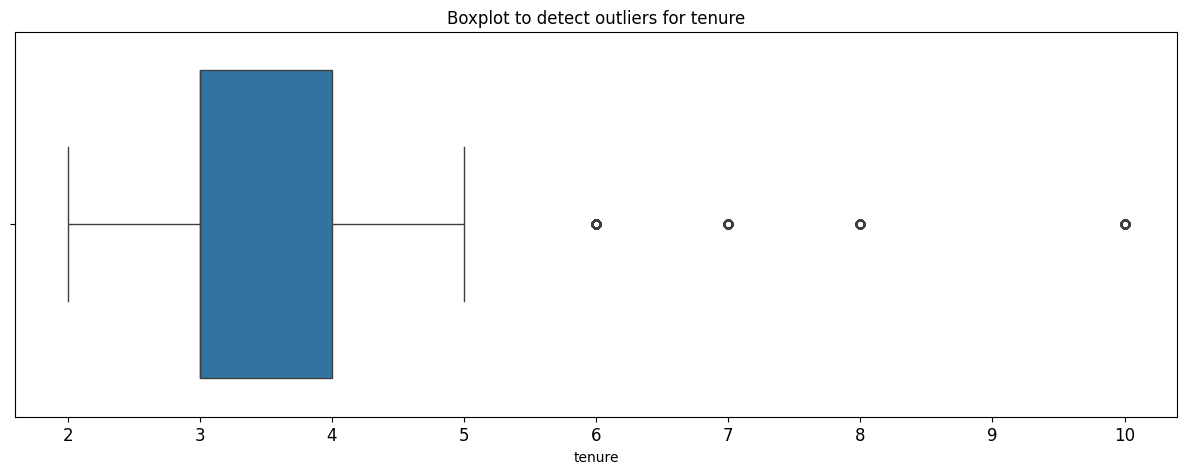

In [15]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(15,5))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot above shows that there are outliers in the `tenure` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [16]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. That is something I have to keep an eye on when I get to the stage of building the model. I will consider whether to remove these outliers based on the type of model I decide to use.

## **pAce Stage 2: Analize**

### Exploratory Data Analysis (Full EDA)
Focus on analizing the relationships between variables.

Beginnning by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


1991 people (approximately 16.6 % of employees) left the company.

#### Data Visualizations

Boxplot of `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left and histogram of `number_project` to compare those who stayed and those who left.

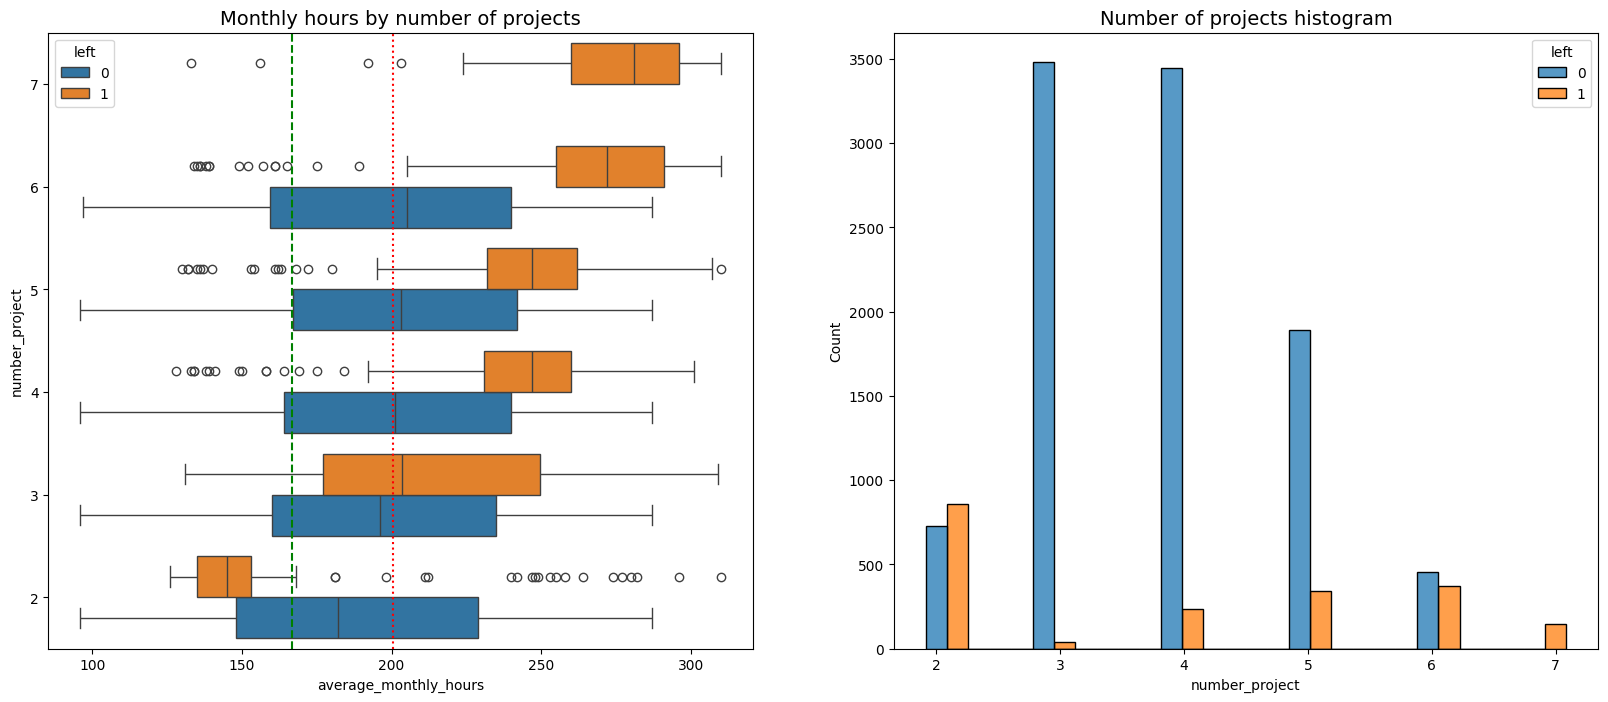

Mean of average monthly hours worked by employees (red dotted line): 200.47 hrs./mo.
Usual monthly hours considering 8 hour shifts, 5 days a week, 4 weeks a month (green dashed line): 166.67 hrs./mo.


In [55]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (20,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')
# plot line showing the mean of 'average_monthly_hours' of all employees
mean_average_monthly_hours = df1['average_monthly_hours'].mean()
ax[0].axvline(x=mean_average_monthly_hours, color='r', label='mean average monthly hours', ls=':')
# plot line showing the monthly hours considering work week of 40 hours and two weeks of vacation per year (50 weeks per year)
usual_monthly_hours = 40*50/12
ax[0].axvline(x=usual_monthly_hours, color='g', label=('usual monthly hours'), ls='--')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

# Print description of lines in boxplot
print('Mean of average monthly hours worked by employees (red dotted line):', round(mean_average_monthly_hours,2), 'hrs./mo.')
print('Usual monthly hours considering 8 hour shifts, 5 days a week, 4 weeks a month (green dashed line):', round(usual_monthly_hours,2), 'hrs./mo.')      

Histogram of `average_monthly_hours`.

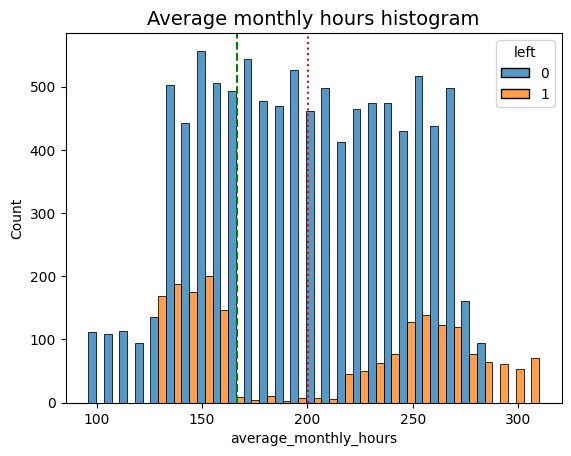

Mean of average monthly hours worked by employees (red dotted line): 200.47 hrs./mo.
Usual monthly hours considering 8 hour shifts, 5 days a week, 4 weeks a month (green dashed line): 166.67 hrs./mo.


In [56]:
# Create histogram showing distribution of `average_monthly_hours`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='average_monthly_hours', hue='left', multiple='dodge')
plt.title('Average monthly hours histogram', fontsize='14')
# plot line showing the mean of 'average_monthly_hours' of all employees
plt.axvline(x=mean_average_monthly_hours, color='r', label='mean average monthly hours', ls=':')
# plot line showing the monthly hours considering work week of 40 hours and two weeks of vacation per year (50 weeks per year)
plt.axvline(x=usual_monthly_hours, color='g', label=('usual monthly hours'), ls='--')

# Display the plots
plt.show()

# Print description of lines in boxplot
print('Mean of average monthly hours worked by employees (red dotted line):', round(mean_average_monthly_hours,2), 'hrs./mo.')
print('Usual monthly hours considering 8 hour shifts, 5 days a week, 4 weeks a month (green dashed line):', round(usual_monthly_hours,2), 'hrs./mo.')      

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.